# Implementation of linear regression

Necessar packages:
1. numpy
2. scikit-learn
3. statsmodels

There are five basic steps when you’re implementing linear regression:

1. Import the packages and classes you need.
2. Provide data to work with and eventually do appropriate transformations.
3. Create a regression model and fit it with existing data.
4. Check the results of model fitting to know whether the model is satisfactory.
5. Apply the model for predictions.
6. These steps are more or less general for most of the regression approaches and implementations.

In [62]:
# Import packages
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [63]:
# Provide necessar data
x = np.array([5, 15, 25, 35, 45, 55])
y = np.array([5, 20, 14, 32, 22, 38])

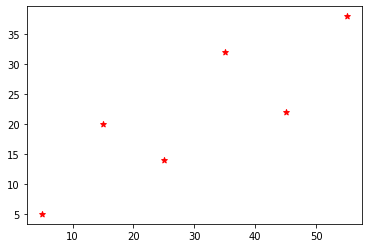

In [64]:
# Plot it
plt.scatter(x,y,color= "red",marker= "*")
plt.show()

In [65]:
# Corr coefs
np.corrcoef(x,y)

array([[1.        , 0.84609433],
       [0.84609433, 1.        ]])

Now, you have two arrays: the input x and output y. You should call .reshape() on x because this array is required to be two-dimensional, or to be more precise, to have one column and as many rows as necessary. That’s exactly what the argument (-1, 1) of .reshape() specifies.

In [66]:
x = x.reshape((-1,1))

In [67]:
# Create model (this instance represents the regression model)
# It has several attributes, that are interesting to examine (Cmd + Tab)
model = LinearRegression()

In [68]:
# Fit the model with data
model.fit(x,y)

LinearRegression()

In [69]:
# Get intercep
model.intercept_

5.633333333333329

In [70]:
# Get coefs of the model
model.coef_

array([0.54])

In [71]:
# Get R^2 of the model
r_sq = model.score(x,y)
r_sq

0.7158756137479542

In [72]:
# Make predictions
y_predicted = model.predict(x)
y_predicted

array([ 8.33333333, 13.73333333, 19.13333333, 24.53333333, 29.93333333,
       35.33333333])

In [73]:
# Almost the same as (difference: only in dimensions)

# The predicted response is now a two-dimensional array, while in the previous case, it had one dimension.
# If you reduce the number of dimensions of x to one, these two approaches will yield the same result. 
# You can do this by replacing x with x.reshape(-1), x.flatten(), or x.ravel() 
# when multiplying it with model.coef_.)
model.intercept_ + model.coef_ * x

array([[ 8.33333333],
       [13.73333333],
       [19.13333333],
       [24.53333333],
       [29.93333333],
       [35.33333333]])

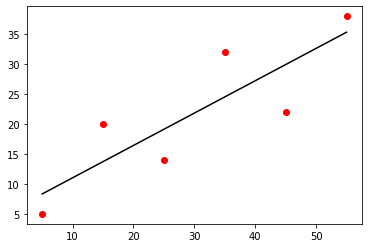

In [74]:
plt.scatter(x,y,color= "red")
plt.plot(x,y_predicted,color= "black")
plt.show()

In [75]:
new_x = np.arange(0,5).reshape((-1,1))
y_forecast = model.predict(new_x)
y_forecast

array([5.63333333, 6.17333333, 6.71333333, 7.25333333, 7.79333333])

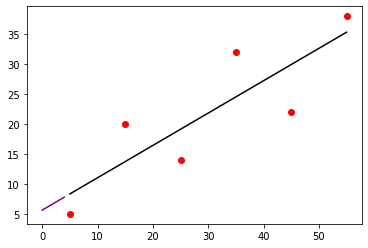

In [76]:
plt.scatter(x,y,color= "red")
plt.plot(x,y_predicted,color= "black")
plt.plot(new_x,y_forecast,color= "purple")
plt.show()

# Now let's talk about multiple linear regression

In [77]:
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)

In [82]:
# .shape -> returns (array.count,array[0].count)
x.shape

(8, 2)

In [83]:
model = LinearRegression().fit(x,y)

In [84]:
model.intercept_

5.52257927519819

In [85]:
model.coef_

array([0.44706965, 0.25502548])

In [88]:
model.score(x,y)

0.8615939258756775

In [90]:
y_predicted = model.predict(x)
y_predicted

array([ 5.77760476,  8.012953  , 12.73867497, 17.9744479 , 23.97529728,
       29.4660957 , 38.78227633, 41.27265006])

# Plynomial regression

This regression is very similar to the linear one, but...\
There is only one extra step: you need to transform the array of inputs to include non-linear terms such as 𝑥².

In [91]:
# Import packages
from sklearn.preprocessing import PolynomialFeatures

In [93]:
# Get data reshaped (as x initially is 1-dimentional)
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])

In [156]:
# Prepare data (here are some other interesting Parameters -> Cmd + Tab) (bias = column of 1 -> intercept)
transformer = PolynomialFeatures(degree= 2, include_bias= True)

In [157]:
# Need to do before transform x
transformer.fit(x)

PolynomialFeatures()

In [158]:
# Transform x to the (1,x,x^2) structure
x_ = transformer.transform(x)
x_
# (1, x, x^2) -> structure of columns

array([[1.000e+00, 5.000e+00, 2.500e+01],
       [1.000e+00, 1.500e+01, 2.250e+02],
       [1.000e+00, 2.500e+01, 6.250e+02],
       [1.000e+00, 3.500e+01, 1.225e+03],
       [1.000e+00, 4.500e+01, 2.025e+03],
       [1.000e+00, 5.500e+01, 3.025e+03]])

In [187]:
# Possible to combine .fit(x) and .transform(x) via -> .fit_transform(x) (it'll lead to the same result)
x_ = PolynomialFeatures(degree= 2, include_bias= True).fit_transform(x)
x_

array([[1.000e+00, 5.000e+00, 2.500e+01],
       [1.000e+00, 1.500e+01, 2.250e+02],
       [1.000e+00, 2.500e+01, 6.250e+02],
       [1.000e+00, 3.500e+01, 1.225e+03],
       [1.000e+00, 4.500e+01, 2.025e+03],
       [1.000e+00, 5.500e+01, 3.025e+03]])

In [195]:
# Create and fit the model
# fit_intercept= False, as it is already included into the X matrics
model = LinearRegression(fit_intercept= False).fit(x_,y)

In [196]:
model.intercept_

0.0

In [197]:
model.coef_

array([21.37232143, -1.32357143,  0.02839286])

In [198]:
y_predicted = model.predict(x_)
y_predicted

array([15.46428571,  7.90714286,  6.02857143,  9.82857143, 19.30714286,
       34.46428571])

In [199]:
model.score(x_,y)

0.8908516262498564

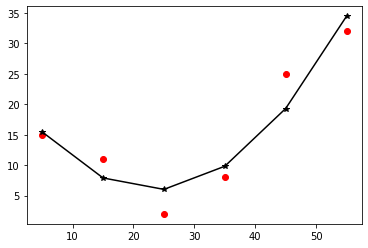

In [200]:
plt.scatter(x,y,color= "red")
plt.plot(x,y_predicted,color= "black",marker= "*")
plt.show()

In [201]:
x_

array([[1.000e+00, 5.000e+00, 2.500e+01],
       [1.000e+00, 1.500e+01, 2.250e+02],
       [1.000e+00, 2.500e+01, 6.250e+02],
       [1.000e+00, 3.500e+01, 1.225e+03],
       [1.000e+00, 4.500e+01, 2.025e+03],
       [1.000e+00, 5.500e+01, 3.025e+03]])

# Statsmodel (more complex regression analysis)

In [202]:
import numpy as np

In [204]:
!pip3 install statsmodels

     |████████████████████████████████| 9.5 MB 5.2 MB/s            
     |████████████████████████████████| 233 kB 5.2 MB/s            


In [205]:
import statsmodels.api as sm

In [206]:
!pip3 list

Package             Version
------------------- ---------
amply               0.1.4
anyio               3.3.4
AnyQt               0.0.10
appnope             0.1.0
argon2-cffi         21.1.0
asgiref             3.2.10
astroid             2.3.3
attrs               21.2.0
autopep8            1.5.5
Babel               2.9.1
backcall            0.2.0
baycomp             1.0.2
beautifulsoup4      4.9.3
bleach              4.1.0
Bottleneck          1.3.2
CacheControl        0.12.6
certifi             2020.6.20
cffi                1.15.0
chardet             3.0.4
commonmark          0.9.1
cplex               20.1.0.1
cryptography        35.0.0
cycler              0.10.0
decorator           4.4.2
defusedxml          0.7.1
dictdiffer          0.8.1
Django              3.1.1
docplex             2.22.213
docutils            0.16
entrypoints         0.3
et-xmlfile          1.0.1
fsspec              0.8.5
h11                 0.9.0
httpcore            0.10.2
httpx               0.14.3
idna           

In [207]:
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)

In [208]:
# To compute intercep -> necessary to .add_constant(where to add constant ~ a.k.a x)
x = sm.add_constant(x)
x

array([[ 1.,  0.,  1.],
       [ 1.,  5.,  1.],
       [ 1., 15.,  2.],
       [ 1., 25.,  5.],
       [ 1., 35., 11.],
       [ 1., 45., 15.],
       [ 1., 55., 34.],
       [ 1., 60., 35.]])

In [219]:
model = sm.OLS(y,x)
model

In [220]:
help(model)

Help on OLS in module statsmodels.regression.linear_model object:

class OLS(WLS)
 |  OLS(endog, exog=None, missing='none', hasconst=None, **kwargs)
 |  
 |  Ordinary Least Squares
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      A 1-d endogenous response variable. The dependent variable.
 |  exog : array_like
 |      A nobs x k array where `nobs` is the number of observations and `k`
 |      is the number of regressors. An intercept is not included by default
 |      and should be added by the user. See
 |      :func:`statsmodels.tools.add_constant`.
 |  missing : str
 |      Available options are 'none', 'drop', and 'raise'. If 'none', no nan
 |      checking is done. If 'drop', any observations with nans are dropped.
 |      If 'raise', an error is raised. Default is 'none'.
 |  hasconst : None or bool
 |      Indicates whether the RHS includes a user-supplied constant. If True,
 |      a constant is not checked for and k_constant is set to 1 and all
 |      result 

In [221]:
help(sm.OLS)

Help on class OLS in module statsmodels.regression.linear_model:

class OLS(WLS)
 |  OLS(endog, exog=None, missing='none', hasconst=None, **kwargs)
 |  
 |  Ordinary Least Squares
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      A 1-d endogenous response variable. The dependent variable.
 |  exog : array_like
 |      A nobs x k array where `nobs` is the number of observations and `k`
 |      is the number of regressors. An intercept is not included by default
 |      and should be added by the user. See
 |      :func:`statsmodels.tools.add_constant`.
 |  missing : str
 |      Available options are 'none', 'drop', and 'raise'. If 'none', no nan
 |      checking is done. If 'drop', any observations with nans are dropped.
 |      If 'raise', an error is raised. Default is 'none'.
 |  hasconst : None or bool
 |      Indicates whether the RHS includes a user-supplied constant. If True,
 |      a constant is not checked for and k_constant is set to 1 and all
 |      result s

In [228]:
res = model.fit()

In [229]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     15.56
Date:                Thu, 04 Nov 2021   Prob (F-statistic):            0.00713
Time:                        15:56:57   Log-Likelihood:                -24.316
No. Observations:                   8   AIC:                             54.63
Df Residuals:                       5   BIC:                             54.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5226      4.431      1.246      0.268      -5.867      16.912
x1             0.4471      0.285      1.567      0.178      -0.286       1.180
x2             0.2550      0.453      0.563      0.598      -0.910       1.420
==============================================================================
Omnibus:                        0.561   Durbin-Watson:                   3.268
Prob(Omnibus):                  0.755   Jarque-Bera (JB):                0.534
Skew:                           0.380   Prob(JB):                        0.766
Kurtosis:                       1.987   Cond. No.                         80.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [230]:
res.summary2()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary2.Summary'>
"""
                Results: Ordinary least squares
================================================================
Model:              OLS              Adj. R-squared:     0.806  
Dependent Variable: y                AIC:                54.6318
Date:               2021-11-04 15:57 BIC:                54.8702
No. Observations:   8                Log-Likelihood:     -24.316
Df Model:           2                F-statistic:        15.56  
Df Residuals:       5                Prob (F-statistic): 0.00713
R-squared:          0.862            Scale:              40.899 
------------------------------------------------------------------
           Coef.    Std.Err.     t      P>|t|     [0.025    0.975]
------------------------------------------------------------------
const      5.5226     4.4306   1.2465   0.2678   -5.8666   16.9118
x1         0.4471     0.2853   1.5669   0.1779   -0.2864    1.1805
x2         0.2550     0.4534   0.5625   0.5980   -0.9104    1.4204
----------------------------------------------------------------
Omnibus:               0.561       Durbin-Watson:          3.268
Prob(Omnibus):         0.755       Jarque-Bera (JB):       0.534
Skew:                  0.380       Prob(JB):               0.766
Kurtosis:              1.987       Condition No.:          80   
================================================================

"""

In [234]:
res.pvalues

array([0.26780658, 0.17791137, 0.59804597])

In [235]:
# Get prediction using the exact model -> used .fittedvalues (if gives the predicted values of the train data)
# Or used .predict(x)
# Both have same results
res.predict(x)

array([ 5.77760476,  8.012953  , 12.73867497, 17.9744479 , 23.97529728,
       29.4660957 , 38.78227633, 41.27265006])

In [236]:
res.fittedvalues

array([ 5.77760476,  8.012953  , 12.73867497, 17.9744479 , 23.97529728,
       29.4660957 , 38.78227633, 41.27265006])